# Theory is available in the markdown file with the same name. 
## Image is for understanding purposes. Enjoy coding!!
![image](https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png)

# Import essential libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
from sklearn.model_selection import learning_curve
import math

# Some important functions

In [23]:
# read the data from the path specified
def read_data(path):
    try:
        data_open = pd.read_csv(path)                       #open data using pandas
        print("data read successfully.")
        try:
            x = data_open.iloc[:, :-1]                      #splittng data between attributes and target values
            y = data_open.iloc[:, -1]
            print("x and y created sucessfully")
            return data_open, x, y
        except:
            print("check your path.")
            return -1
    except:
        print("check your path.")
        return -1


    
# train test split
def split(x, y):                                            #splitting x and y into train and test set using sklearn
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test




# plot learning curves
def plot_learning_curves(model, x, y, ylimb, ylimt):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    train_errors = []
    test_errors = []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_pred = model.predict(x_train[:m])
        y_test_pred = model.predict(x_test[:m])
        train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
        test_errors.append(mean_squared_error(y_test[:m], y_test_pred))
    plt.figure(figsize=(5, 4))
    plt.plot(np.sqrt(train_errors), "r-", linewidth=1, label="train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=1, label="test")
    plt.ylim(ylimb, ylimt)
    plt.title("Learning Curve")
    plt.legend()
    
    
# visualising the model
def visual_linear(model, x, y, title):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    model.fit(x_train, y_train)
    train_val=[]
    train_pred_val=[]
    test_val = []
    test_pred_val = []
    for i in range(60):
        train_pred_val.append(model.predict(x_train[i:i+1]))
        train_val.append(y_train[i:i+1].to_numpy())

    for i in range(60):
        test_pred_val.append(model.predict(x_test[i:i+1]))
        test_val.append(y_test[i:i+1].to_numpy()) 


    plt.figure(figsize=(5, 4))
    plt.title(title)
    plt.plot((train_val), "r-+", linewidth=1, label="train_value")
    plt.plot((train_pred_val), "b-", linewidth=1, label="train_pred")
    plt.legend()
    plt.show()
    plt.figure(figsize=(5, 4))
    plt.plot((test_val), "r-+", linewidth=1, label="test_value")
    plt.plot((test_pred_val), "k-", linewidth=1, label="test_pred")
    plt.legend()
    plt.show()

In [24]:
data, x, y = read_data("Concrete_Data.csv")

data read successfully.
x and y created sucessfully


# Overfitting example using Linear Regression

#### As shown in the graph this model is overfitting the data
#### Training error < Test error

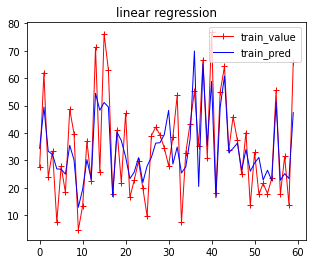

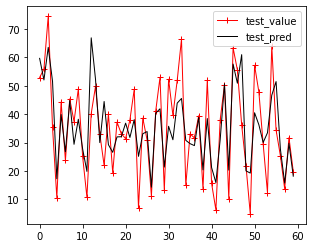

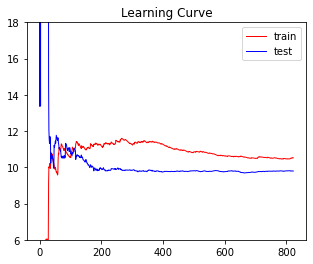

In [25]:
linear = LinearRegression()
visual_linear(linear, x, y, "linear regression")
plot_learning_curves(linear, x, y, 6, 18)

# Overfitting example using Random Forest Regression

#### Random Forest is fairly prone to overfitting as shown by the graphs
#### Training error < Test error

In [27]:
rf1= RandomForestRegressor(n_estimators=100, criterion='mse', random_state=42, n_jobs=-1, max_features=4, min_samples_leaf=1)

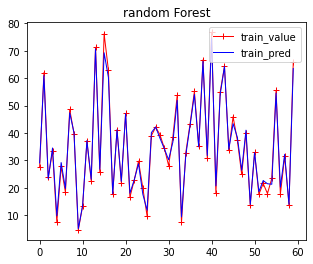

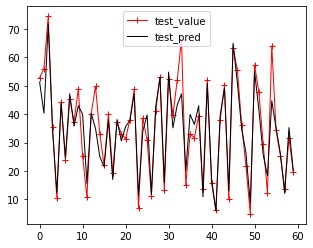

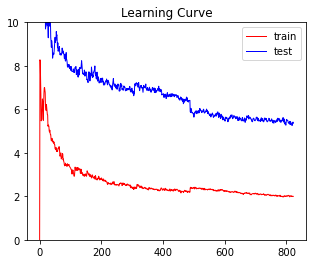

In [28]:
visual_linear(rf1, x, y, "random Forest")
plot_learning_curves(rf1, x, y, 0, 10)

# Underfitting example using Support Vector Regression

#### Support Vector regression in this case is heavily regularized by the parameter C=0.8 which results in an underfitting model. You can see that the model is not even to perform well on the training set.
#### Training error > Test error

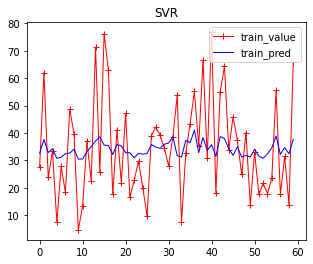

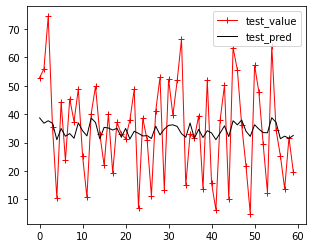

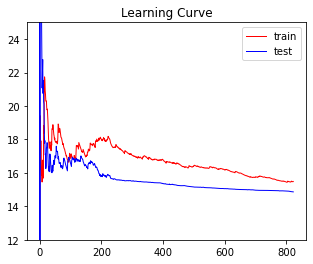

In [37]:
svc_lc = SVR(kernel="poly", degree=1, C=0.8, epsilon=3)
visual_linear(svc_lc, x, y, "SVR")
plot_learning_curves(svc_lc,x, y, 12, 25)

# So, now you have understood the concept of Underfitting and Overfitting. You can play with the parameters to see how the graphs behave.